<a href="https://colab.research.google.com/github/rahulovi001/project-01/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Linear Regression

Great\! You've mastered simple linear regression, which uses one variable to predict another. But what if you have **more than one feature** to make a prediction? That's where **multiple linear regression** comes in.

The idea is exactly the same: we're still trying to find the best-fit relationship. But instead of a simple 2D line, we're now fitting a model in a higher dimension.

The equation just expands to include the new variables:

$$y = b_1x_1 + b_2x_2 + b_0 $$

$$ or $$

$$y = m_1x_1 + m_2x_2 +c $$

$$y = w_1x_1 + w_2x_2 +b $$

  * $y$ is still the value we want to predict.
  * $x_1, x_2, \dots, x_n$ are the different independent variables (our features).
  * $b_1, b_2, \dots, b_n$ are the **coefficients** for each feature. They tell us how much $y$ changes for a one-unit change in that specific feature, *assuming all other features remain constant*.
  * $b_0$ is the **intercept**, the value of $y$ when all features are zero.

-----

### Step 1: Create a New Dataset

Let's create a dataset to predict a house's price (`y`). We'll use two features: the size of the house in square feet ($x_1$) and the number of bedrooms ($x_2$).


In [ ]:
# First, let's import the tools we'll need for our project
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Independent variables (Features)
# [Square Footage, Number of Bedrooms]
X_multi = np.array([
    [1500, 3],
    [1800, 4],
    [1200, 2],
    [2000, 4],
    [1650, 3],
    [2400, 5],
    [1300, 3]
])

# Dependent variable (House Price in thousands of $)
y_multi = np.array([300, 380, 250, 420, 340, 500, 280])

print("Features (X):")
print(X_multi)
print("\nPrice (y):")
print(y_multi)

Features (X):
[[1500    3]
 [1800    4]
 [1200    2]
 [2000    4]
 [1650    3]
 [2400    5]
 [1300    3]]

Price (y):
[300 380 250 420 340 500 280]


Notice that `X_multi` now has two columns instead of one.

-----

### Step 2: Create and Train the Model

Here's the best part: the code to create and train the model is **exactly the same**\! The `scikit-learn` library is smart enough to handle multiple features automatically.

### In[9]:

In [ ]:
# 1. Create a new linear regression model object
multi_model = LinearRegression()

# 2. Train the model using our new multi-feature data
multi_model.fit(X_multi, y_multi)

print(" Multi-feature model training complete!")

✅ Multi-feature model training complete!


-----

### Step 3: Check the Results

Now, instead of one slope, we'll get a list of coefficients—one for each feature.


In [ ]:
# Get the intercept (b_0)
multi_intercept = multi_model.intercept_

# Get the coefficients (b_1, b_2, ...)
multi_coeffs = multi_model.coef_

print(f"The intercept (b_0) is: {multi_intercept:.2f}")
print(f"The coefficient for Square Footage (b_1) is: {multi_coeffs[0]:.2f}")
print(f"The coefficient for Number of Bedrooms (b_2) is: {multi_coeffs[1]:.2f}")

The intercept (b_0) is: 3.49
The coefficient for Square Footage (b_1) is: 0.18
The coefficient for Number of Bedrooms (b_2) is: 12.18


**What does this mean?**

  * **Coefficient for Square Footage ≈ 0.17**: For every extra square foot of space, the model predicts the house price will increase by about `$170` (since our units are in thousands), assuming the number of bedrooms stays the same.
  * **Coefficient for Number of Bedrooms ≈ 23.95**: For every additional bedroom, the model predicts the price will increase by about `$23,950`, assuming the square footage stays the same.

-----

### Step 4: Visualize the Best-Fit Plane (Optional but Insightful\!)

**Why visualize when we have multiple features?**
With simple linear regression, visualizing the "best-fit line" on a 2D scatter plot is straightforward. When we add a second feature (making it three variables in total: `feature1`, `feature2`, and `target`), our "line" becomes a **plane** in 3D space.

While we can't easily visualize models with *more* than two features (because that would require more than 3 dimensions, which is hard for us to see\!), a 3D plot for two features helps us understand:

1.  How the independent variables (`Square Footage`, `Number of Bedrooms`) collectively influence the dependent variable (`House Price`).
2.  The "surface" our model has learned to make predictions. Each point on this plane represents a predicted house price for a given square footage and number of bedrooms.

Let's see our data points and the regression plane in 3D.


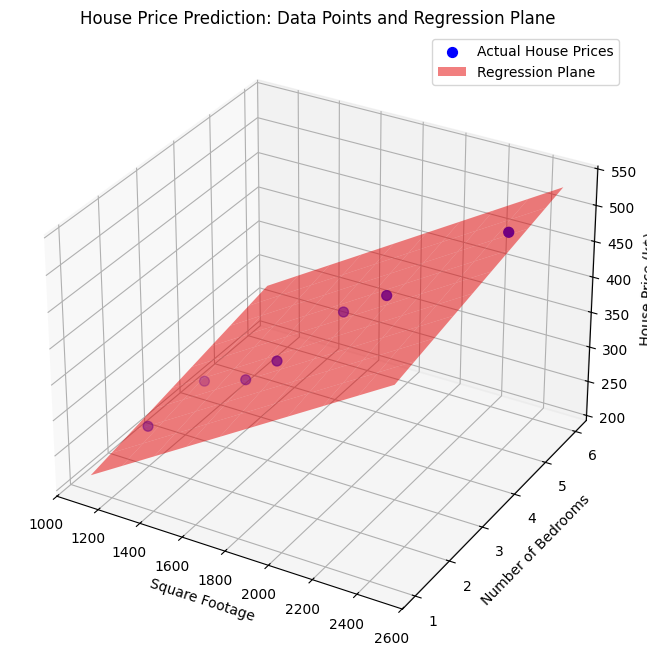

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X_multi[:, 0], X_multi[:, 1], y_multi, color='blue', s=50, label='Actual House Prices')

# Create a meshgrid for the plane
# This creates a grid of all possible combinations of Square Footage and Bedrooms
sq_footage_range = np.linspace(X_multi[:, 0].min() - 100, X_multi[:, 0].max() + 100, 10).reshape(-1, 1)
bedrooms_range = np.linspace(X_multi[:, 1].min() - 1, X_multi[:, 1].max() + 1, 10).reshape(-1, 1)

SF, BR = np.meshgrid(sq_footage_range, bedrooms_range)
plane_features = np.c_[SF.ravel(), BR.ravel()]
predicted_plane_prices = multi_model.predict(plane_features)

# Plot the regression plane
ax.plot_surface(SF, BR, predicted_plane_prices.reshape(SF.shape), alpha=0.5, color='red', label='Regression Plane')

ax.set_xlabel('Square Footage')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('House Price (k$)')
ax.set_title('House Price Prediction: Data Points and Regression Plane')
ax.legend()
plt.show()

The red surface you see is our regression plane, representing the model's predictions across a range of square footages and numbers of bedrooms. The blue dots are the actual house prices we used to train the model. Our goal is for the plane to be as close as possible to all the dots, minimizing the "distance" (or error) between them.

-----

### Step 5: Make a Prediction

Let's use our new model to predict the price of a house that is **1700 sq. ft.** and has **3 bedrooms**.


In [ ]:
# Let's predict the price for a new house
# [Square Footage, Number of Bedrooms]
new_house = np.array([[1700, 3]])

# Use the model to predict
predicted_price = multi_model.predict(new_house)

print(f"Predicted price for the new house: ${predicted_price[0]:.2f}k")

Predicted price for the new house: $348.93k


And that's it\! You've now built a model that can take multiple factors into account to make a more nuanced prediction. This is the foundation of many powerful machine learning models.